## DNN Example for Fashion MNIST Dataset

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

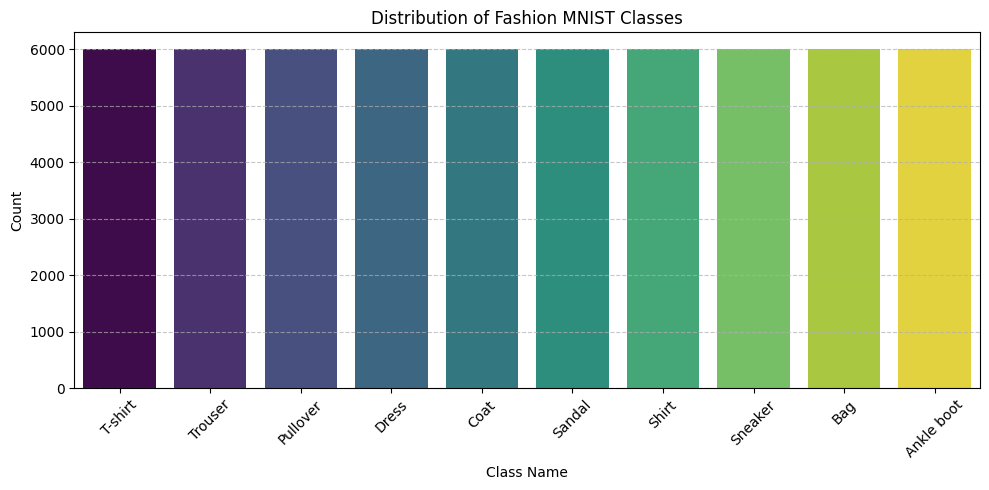

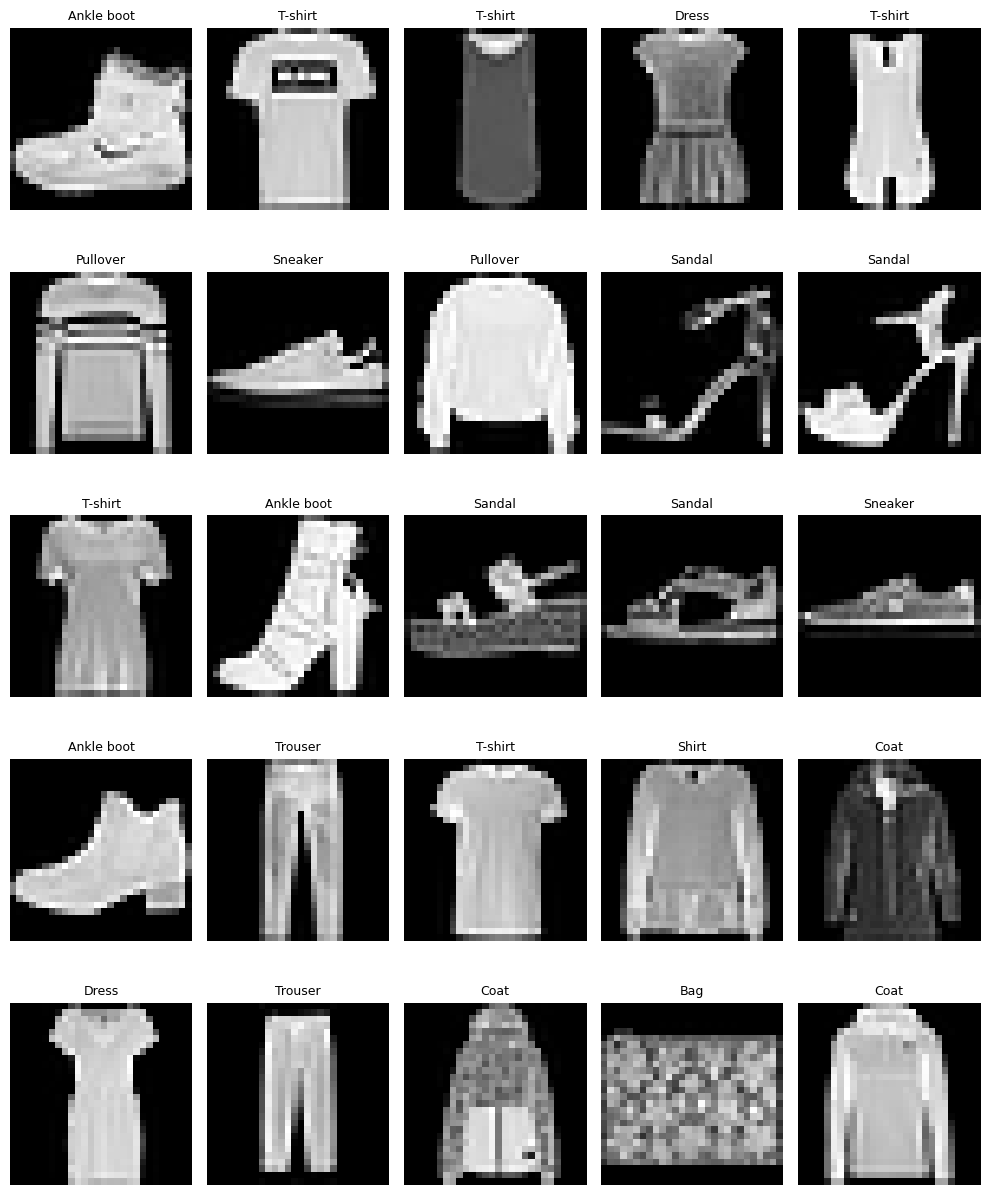

In [4]:
def plot_label_distribution(labels, class_names):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=labels, hue=labels, palette="viridis", legend=False)
    plt.xticks(np.arange(10), class_names, rotation=45)
    plt.title("Distribution of Fashion MNIST Classes")
    plt.xlabel("Class Name")
    plt.ylabel("Count")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot sample images
def plot_fashion_mnist(images, labels, class_names, rows=5, cols=5):
    plt.figure(figsize=(2 * cols, 2.5 * rows))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(class_names[labels[i]], fontsize=9)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_label_distribution(y_train, class_names)
plot_fashion_mnist(x_train, y_train, class_names)

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [7]:
def create_model():
    initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05)
    model = models.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(512, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.4),

        layers.Dense(256, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),

        layers.Dense(128, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.2),

        layers.Dense(64, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.1),

        layers.Dense(10, activation='softmax')
    ])
    return model

In [8]:
model = create_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 578,890 (2.21 MB)

 Trainable params: 576,970 (2.20 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [10]:
history = model.fit(x_train, y_train, validation_split=0.2,
                    epochs=20, batch_size=128, verbose=2)

Epoch 1/20
375/375 - 4s - 10ms/step - accuracy: 0.7811 - loss: 0.6389 - val_accuracy: 0.8511 - val_loss: 0.4087
Epoch 2/20
375/375 - 2s - 5ms/step - accuracy: 0.8402 - loss: 0.4463 - val_accuracy: 0.8614 - val_loss: 0.3715
Epoch 3/20
375/375 - 2s - 5ms/step - accuracy: 0.8571 - loss: 0.3987 - val_accuracy: 0.8726 - val_loss: 0.3558
Epoch 4/20
375/375 - 2s - 5ms/step - accuracy: 0.8660 - loss: 0.3762 - val_accuracy: 0.8715 - val_loss: 0.3539
Epoch 5/20
375/375 - 2s - 6ms/step - accuracy: 0.8689 - loss: 0.3606 - val_accuracy: 0.8776 - val_loss: 0.3304
Epoch 6/20
375/375 - 2s - 5ms/step - accuracy: 0.8752 - loss: 0.3455 - val_accuracy: 0.8789 - val_loss: 0.3324
Epoch 7/20
375/375 - 2s - 6ms/step - accuracy: 0.8815 - loss: 0.3283 - val_accuracy: 0.8816 - val_loss: 0.3249
Epoch 8/20
375/375 - 2s - 6ms/step - accuracy: 0.8845 - loss: 0.3210 - val_accuracy: 0.8790 - val_loss: 0.3304
Epoch 9/20
375/375 - 2s - 6ms/step - accuracy: 0.8882 - loss: 0.3113 - val_accuracy: 0.8756 - val_loss: 0.3425


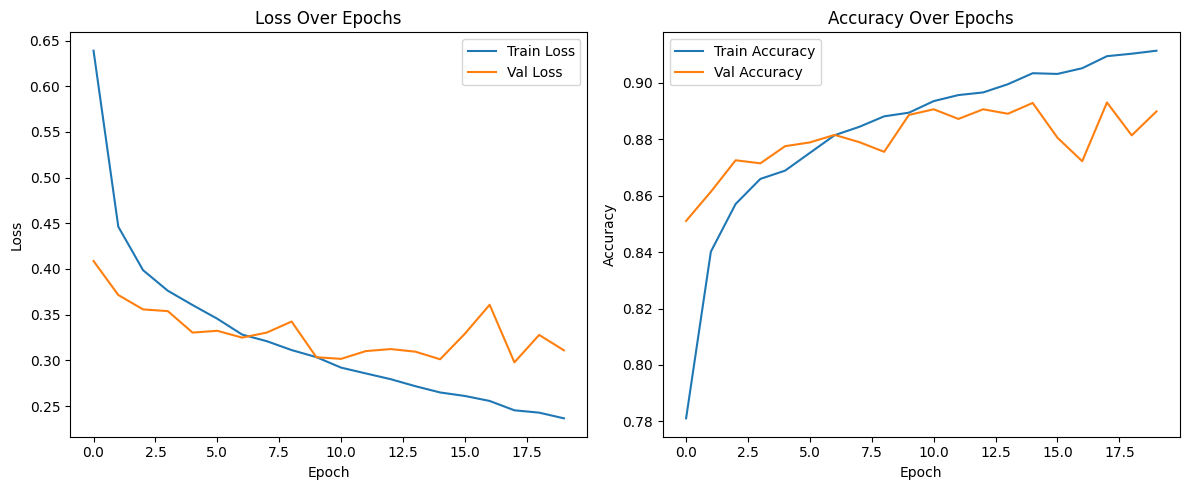

In [11]:
def plot_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.8858


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


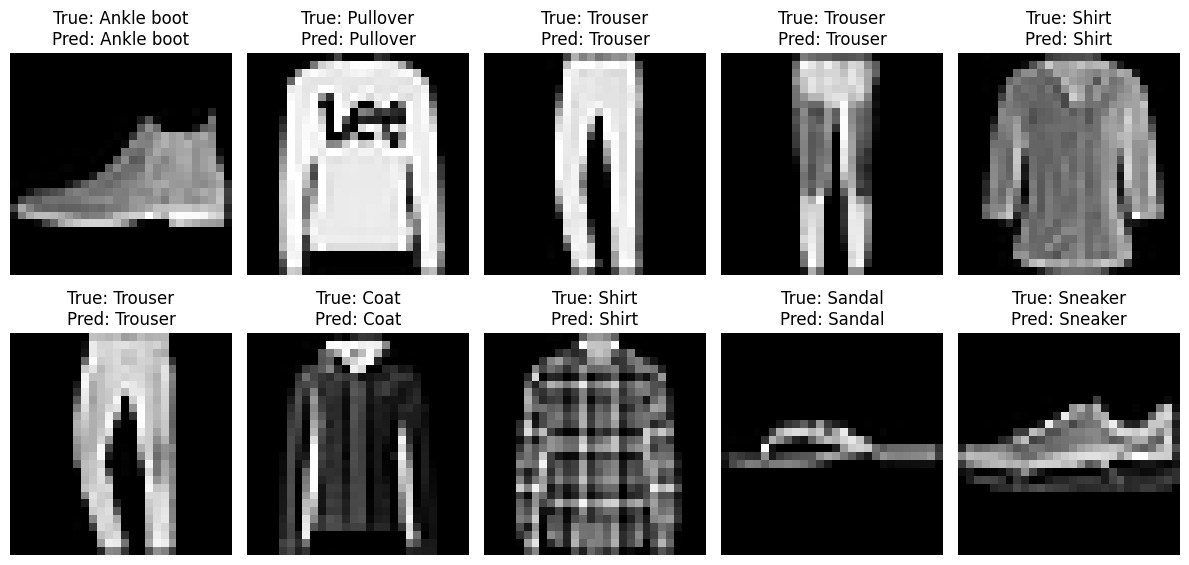

In [13]:
def show_predictions(model, x_test, y_test):
    preds = model.predict(x_test)
    pred_classes = np.argmax(preds, axis=1)

    plt.figure(figsize=(12, 6))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {class_names[y_test[i]]}\nPred: {class_names[pred_classes[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_predictions(model, x_test, y_test)

## ResNet (DNN) Example for Fashion MNIST Dataset

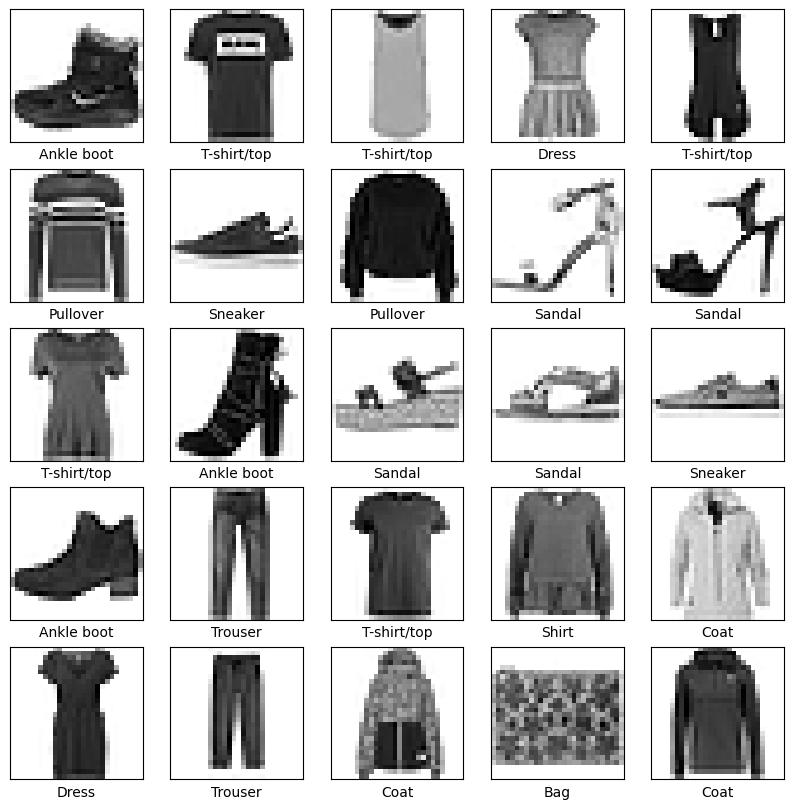

In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Add, Activation, BatchNormalization, Dropout, GaussianNoise
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train_flat = x_train.reshape(-1,784).astype('float32') / 255.0
x_test_flat = x_test.reshape(-1,784).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()

In [16]:
def create_dnn():
    inputs = Input(shape=(784,))
    x = Dense(256, activation='relu')(inputs)
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(10, activation='softmax')(x)
    return Model(inputs, outputs)

def create_resnet_dnn():
    inputs = Input(shape=(784,))
    x = GaussianNoise(0.05)(inputs)
    x=Dropout(0.2)(x)
    x = Dense(512, kernel_regularizer=l2(5e-4))(x)
    x = BatchNormalization()(x)
    x = Activation('swish')(x)
    x = Dropout(0.6)(x)

    x1 = Dense(512, kernel_regularizer=l2(5e-4))(x)
    x1 = BatchNormalization()(x1)
    x1 = Activation('swish')(x1)
    x1 = Dropout(0.6)(x1)

    x2 = Dense(512, kernel_regularizer=l2(5e-4))(x1)
    x2 = BatchNormalization()(x2)
    res1 = Add()([x, x2])
    res1 = Activation('swish')(res1)

    x3 = Dense(256, kernel_regularizer=l2(5e-4))(res1)
    x3 = BatchNormalization()(x3)
    x3 = Activation('swish')(x3)
    x3 = Dropout(0.5)(x3)

    x4 = Dense(256, kernel_regularizer=l2(5e-4))(x3)
    x4 = BatchNormalization()(x4)
    res1_down = Dense(256, kernel_regularizer=l2(5e-4))(res1)
    res1_down = BatchNormalization()(res1_down)
    res2 = Add()([res1_down, x4])
    res2 = Activation('swish')(res2)

    x_final = Dense(128, kernel_regularizer=l2(5e-4))(res2)
    x_final = BatchNormalization()(x_final)
    x_final = Activation('swish')(x_final)
    x_final = Dropout(0.4)(x_final)

    outputs = Dense(10, activation='softmax')(x_final)
    return Model(inputs, outputs)

In [19]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

def create_dnn():
    inputs = Input(shape=(784,))
    x = Dense(256, activation='relu')(inputs)   # Hidden Layer 1
    x = Dense(256, activation='relu')(x)        # Hidden Layer 2
    x = Dense(128, activation='relu')(x)        # Hidden Layer 3
    x = Dense(64, activation='relu')(x)         # Hidden Layer 4
    outputs = Dense(10, activation='softmax')(x)  # Output Layer
    return Model(inputs, outputs)

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Activation, Add, GaussianNoise
from tensorflow.keras.regularizers import l2

def create_resnet_dnn():
    inputs = Input(shape=(784,))
    x = GaussianNoise(0.05)(inputs)
    x = Dropout(0.2)(x)

    x = Dense(512, kernel_regularizer=l2(5e-4))(x)  # Layer 1
    x = BatchNormalization()(x)
    x = Activation('swish')(x)
    x = Dropout(0.6)(x)

    x1 = Dense(512, kernel_regularizer=l2(5e-4))(x)  # Layer 2
    x1 = BatchNormalization()(x1)
    x1 = Activation('swish')(x1)
    x1 = Dropout(0.6)(x1)

    x2 = Dense(512, kernel_regularizer=l2(5e-4))(x1)  # Layer 3
    x2 = BatchNormalization()(x2)
    x2 = Activation('swish')(x2)
    res1 = Add()([x, x2])
    res1 = Activation('swish')(res1)

    x3 = Dense(256, kernel_regularizer=l2(5e-4))(res1)  # Layer 4
    x3 = BatchNormalization()(x3)
    x3 = Activation('swish')(x3)
    x3 = Dropout(0.5)(x3)

    x4 = Dense(256, kernel_regularizer=l2(5e-4))(x3)  # Layer 5
    x4 = BatchNormalization()(x4)
    x4 = Activation('swish')(x4)

    res1_down = Dense(256, kernel_regularizer=l2(5e-4))(res1)  # Layer 6
    res1_down = BatchNormalization()(res1_down)
    res2 = Add()([res1_down, x4])
    res2 = Activation('swish')(res2)

    x5 = Dense(256, kernel_regularizer=l2(5e-4))(res2)  # Layer 7
    x5 = BatchNormalization()(x5)
    x5 = Activation('swish')(x5)

    x6 = Dense(256, kernel_regularizer=l2(5e-4))(x5)  # Layer 8
    x6 = BatchNormalization()(x6)
    x6 = Activation('swish')(x6)
    res3 = Add()([res2, x6])
    res3 = Activation('swish')(res3)

    x7 = Dense(128, kernel_regularizer=l2(5e-4))(res3)  # Layer 9
    x7 = BatchNormalization()(x7)
    x7 = Activation('swish')(x7)

    x8 = Dense(128, kernel_regularizer=l2(5e-4))(x7)  # Layer 10
    x8 = BatchNormalization()(x8)
    x8 = Activation('swish')(x8)

    x9 = Dense(64, kernel_regularizer=l2(5e-4))(x8)  # Layer 11
    x9 = BatchNormalization()(x9)
    x9 = Activation('swish')(x9)

    x10 = Dense(64, kernel_regularizer=l2(5e-4))(x9)  # Layer 12
    x10 = BatchNormalization()(x10)
    x10 = Activation('swish')(x10)

    outputs = Dense(10, activation='softmax')(x10)
    return Model(inputs, outputs)


In [37]:
dnn_model = create_dnn()
resnet_model = create_resnet_dnn()
optimizer = Adam(learning_rate=0.0002, weight_decay=1e-4)

dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model.compile(optimizer=optimizer,loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),metrics=['accuracy'])

callbacks = [
    ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, min_lr=1e-6),
    EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)]

In [38]:
dnn_history = dnn_model.fit(x_train_flat, y_train, 
                            epochs=10, 
                            batch_size=128, 
                            validation_split=0.2,
                            verbose=1)

resnet_history = resnet_model.fit(x_train_flat, y_train, 
                                 epochs=175, 
                                 batch_size=128, 
                                 validation_data=(x_test_flat, y_test),
                                 callbacks=callbacks,
                                 verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7393 - loss: 0.7570 - val_accuracy: 0.8518 - val_loss: 0.4127
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8608 - loss: 0.3815 - val_accuracy: 0.8769 - val_loss: 0.3455
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8766 - loss: 0.3350 - val_accuracy: 0.8687 - val_loss: 0.3608
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8826 - loss: 0.3143 - val_accuracy: 0.8756 - val_loss: 0.3378
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8925 - loss: 0.2938 - val_accuracy: 0.8777 - val_loss: 0.3321
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8984 - loss: 0.2722 - val_accuracy: 0.8842 - val_loss: 0.3263
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9011 - loss: 0.2609 - val_accuracy: 0.8864 - val_loss: 0.3126
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9092 - loss: 0.2404 - val_accuracy: 0.

In [39]:
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.suptitle(title)
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    
    plt.show()

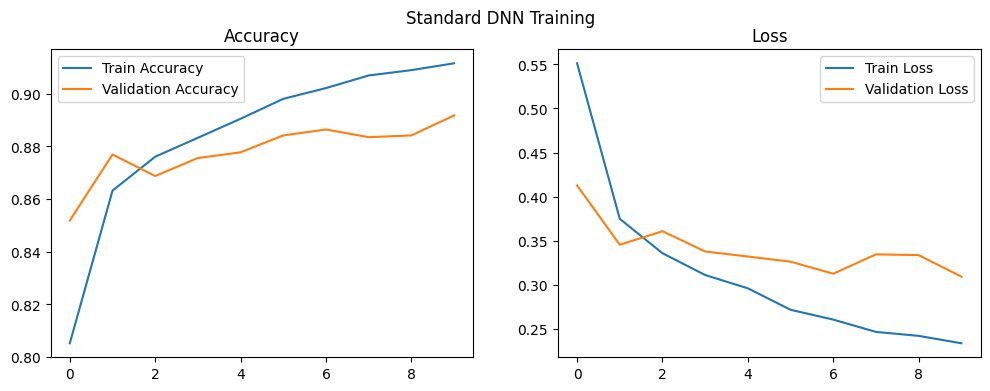

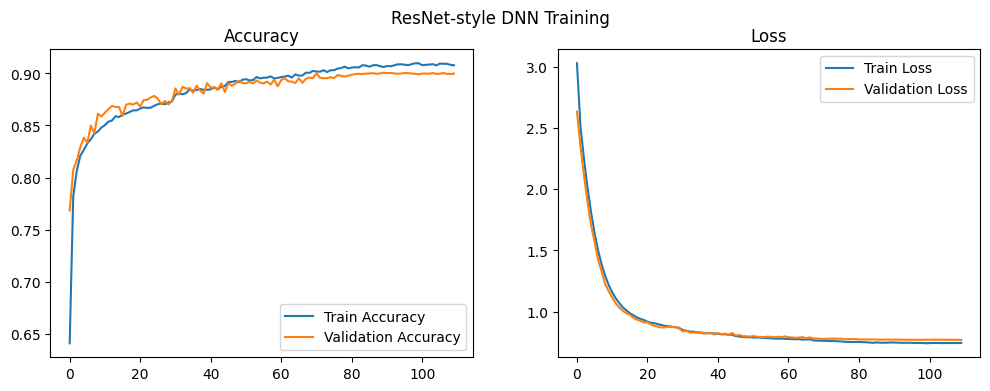

In [40]:
plot_history(dnn_history, 'Standard DNN Training')
plot_history(resnet_history, 'ResNet-style DNN Training')

In [41]:
dnn_test_loss, dnn_test_acc = dnn_model.evaluate(x_test_flat, y_test, verbose=0)
resnet_test_loss, resnet_test_acc = resnet_model.evaluate(x_test_flat, y_test, verbose=0)

In [42]:
print(f"Standard DNN Test Accuracy: {dnn_test_acc:.4f}")
print(f"ResNet-style DNN Test Accuracy: {resnet_test_acc:.4f}")

Standard DNN Test Accuracy: 0.8848
ResNet-style DNN Test Accuracy: 0.9006



Standard DNN Predictions:
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


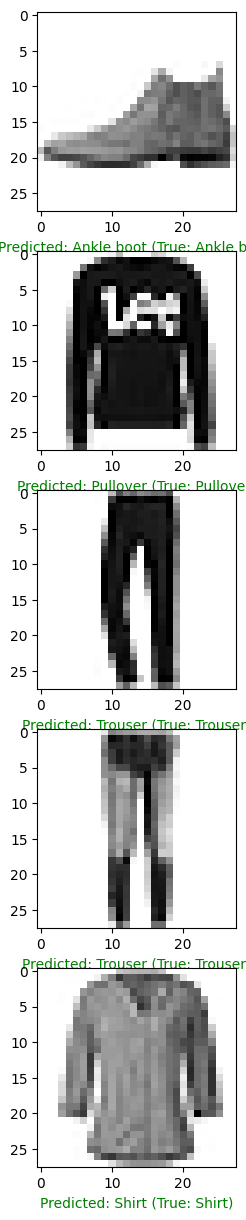


ResNet-style DNN Predictions:
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


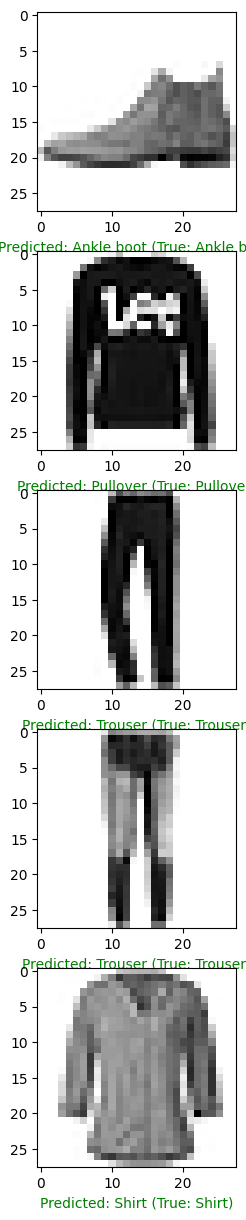

In [43]:
def plot_predictions(model, x_test, y_test, num_images=5):
    predictions = model.predict(x_test)
    plt.figure(figsize=(15, 3*num_images))
    for i in range(num_images):
        plt.subplot(num_images, 1, i+1)
        plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
        pred_label = np.argmax(predictions[i])
        true_label = np.argmax(y_test[i])
        color = 'green' if pred_label == true_label else 'red'
        plt.xlabel(f"Predicted: {class_names[pred_label]} (True: {class_names[true_label]})", color=color)
    plt.show()

print("\nStandard DNN Predictions:")
plot_predictions(dnn_model, x_test_flat, y_test)

print("\nResNet-style DNN Predictions:")
plot_predictions(resnet_model, x_test_flat, y_test)

Comparison Report: Traditional DNN vs ResNet-Inspired Deep Neural Network

We developed and evaluated two deep learning architectures for a 10-class classification task:

Traditional DNN – A basic fully connected neural network utilizing ReLU activation functions and no additional regularization techniques.

ResNet-Inspired Deep Neural Network – A more sophisticated model featuring residual connections, Swish activation, batch normalization, Gaussian noise, dropout layers, and L2 regularization.

Model Architectures
Standard DNN
Input: 784-dimensional vector (flattened image)
Layers:
Dense(256) + ReLU
Dense(256) + ReLU
Dense(128) + ReLU
Dense(64) + ReLU
Output: Dense(10, softmax)

Deep ResNet-style DNN (12-Layer)
Input & Regularization:
GaussianNoise(0.05)
Dropout(0.2)
Total Hidden Layers: 12
These are:

3 in the first residual block

3 in the second residual block

6 more Dense layers stacked sequentially

Results
Metric	Standard DNN	 Test Accuracy	88.48%
ResNet-style DNN        Test Accuracy	90.06%
The ResNet-style model outperformed the standard DNN by +1.58%, showing better generalization and robustness.